In [2]:
from funman.server.query import FunmanResults
import json
from scipy import integrate

ENTROPY_RESULTS_FILE = "../out/6480bf47-debc-4072-a950-aa30e58c1a58.json"
BASELINE_RESULTS_FILE =  "../out/66ded044-11d8-4513-bb8d-0f0b81b90a34.json"

def open_results(results_file_path):
    with open(results_file_path, "r") as results_file:
        results = FunmanResults.model_validate(json.load(results_file))
        return results

entropy_results = open_results(ENTROPY_RESULTS_FILE)
baseline_results = open_results(BASELINE_RESULTS_FILE)

entropy_timing = entropy_results.timing
baseline_timing = baseline_results.timing

import pandas as pd
from datetime import timedelta

def progress_to_dataframe(timing, name):
    df = pd.DataFrame(timing.progress_timeseries).rename(columns={0:"time", 1:name})
    # .set_index("time")
    df.time = df.time.apply(lambda x: x-timing.start_time)
    df = pd.concat([pd.DataFrame({"time":[timedelta()], name:0.0}), df])
    # df.loc[timing.start_time] = 0.0
    df = df.set_index("time").sort_index()
    return df

entropy_df = progress_to_dataframe(entropy_timing, "entropy").rolling(2).apply(integrate.trapezoid)
baseline_df = progress_to_dataframe(baseline_timing, "baseline").rolling(2).apply(integrate.trapezoid)
comparison_df = entropy_df.join(baseline_df, how="outer")





comparison_df = comparison_df.interpolate(method="pad", limit_direction="forward")
comparison_df.to_json("results.json")
comparison_df.cumsum().max()

# entropy_df
# baseline_df

# comparison_df.rolling(2).apply(integrate.trapezoid)

/tmp/ipykernel_57680/3063950419.py:39: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  comparison_df = comparison_df.interpolate(method="pad", limit_direction="forward")


entropy     46.034117
baseline    43.599075
dtype: float64

Text(0, 0.5, 'Progress %/100')

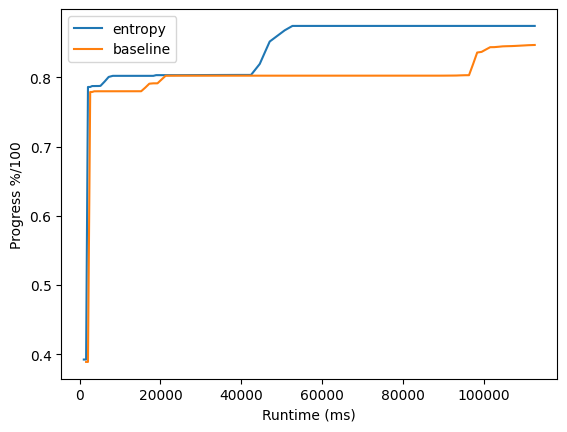

In [1]:

import matplotlib.pyplot as plt
import pandas as pd

comparison_df = pd.read_json("results.json")
# comparison_df = comparison_df.interpolate(method="pad")
ax = plt.gca()
ax.plot(comparison_df.entropy.dropna())
ax.plot(comparison_df.baseline.dropna())
ax.legend(labels=comparison_df.columns)
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("Runtime (ms)")
ax.set_ylabel("Progress %/100")
# ax.set_xticklabels(range(0.0, 1.0, 0.1))


# comparison_df, pad_df

In [2]:
comparison_df



,entropy,baseline
0,0.000000,0.000000
1005,0.000000,0.778212
1034,0.779330,0.778212
2033,0.779330,0.778417
2054,0.779806,0.778417
...,...,...
106593,0.792214,0.938429
107760,0.792214,0.938646
109048,0.792214,0.938731
110332,0.792214,0.938867
